In [12]:
import kagglehub, numpy, pandas as pd, matplotlib.pyplot as plt


df = pd.read_csv("Salary_dataset.csv")

In [ ]:
#Linear regression is a statistical method used to model the relationship between a dependent variable and one or more independent variables by fitting a straight line (in simple linear regression) or a hyperplane (in multiple linear regression)

In [ ]:
#The goal is to find the line that minimizes the sum of squared differences between the observed values and the values predicted by the model.

In [ ]:
#VISUALISING DATA

In [15]:
df.describe()

,Unnamed: 0,YearsExperience,Salary
count,30.000000,30.000000,30.000000
mean,14.500000,5.413333,76004.000000
std,8.803408,2.837888,27414.429785
min,0.000000,1.200000,37732.000000
25%,7.250000,3.300000,56721.750000
50%,14.500000,4.800000,65238.000000
75%,21.750000,7.800000,100545.750000
max,29.000000,10.600000,122392.000000


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       30 non-null     int64  
 1   YearsExperience  30 non-null     float64
 2   Salary           30 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 852.0 bytes


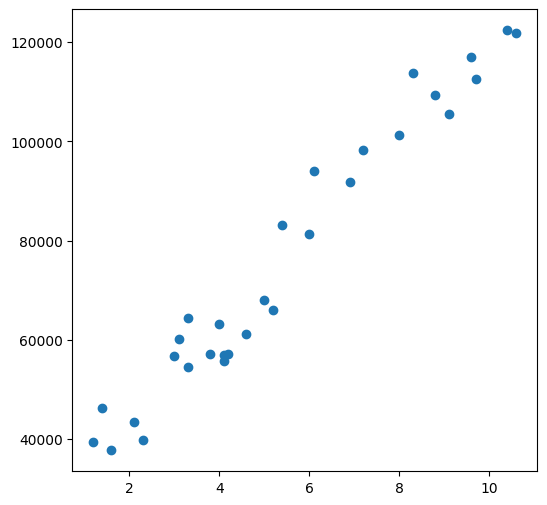

In [41]:
plt.figure(figsize=(6, 6))
plt.scatter(df['YearsExperience'], df['Salary'])

In [ ]:
#Our function is a linear in a form of: y = ax + b

In [ ]:
#So we have to parameters to change in order to minimalize the error. To calculate the error we will use a Mean Squared Error function: Error = 1/n * ∑ ( i = 0 to n ) = ( yi− (a*x_i + b))2 

In [31]:
def MSE(a: float, b: float, points):

    total_error = 0

    x = df['YearsExperience']
    y = df['Salary']

    for i in range(len(points)):
        total_error += (y[i] - (a*x[i] + b))**2

    return total_error / len(points)
    

In [ ]:
#Just to show the algorithm itself, I will randomly choose the parameters and calculate the MSE with respect to them

In [22]:
import random

In [26]:
random.seed(10)
a = random.random()
b = random.random()
print(f'a: {a}, b: {b}')

a: 0.5714025946899135, b: 0.4288890546751146


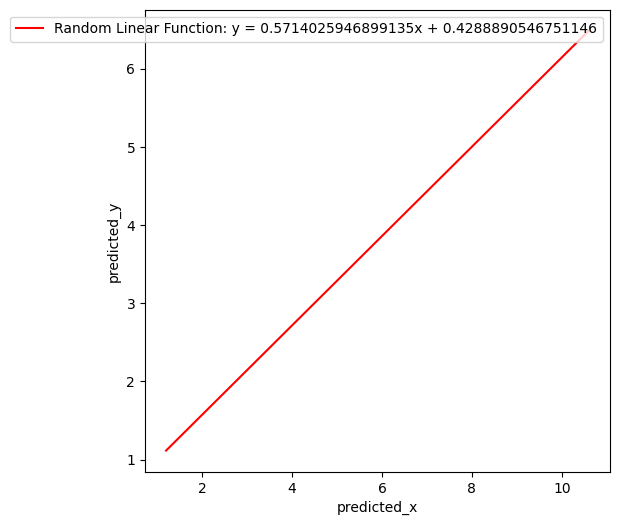

In [52]:
plt.figure(figsize=(6, 6))
plt.plot(df['YearsExperience'], a * df['YearsExperience'] + b, color = 'red', label = f'Random Linear Function: y = {a}x + {b}')
plt.xlabel("predicted_x")
plt.ylabel("predicted_y")
plt.legend()
plt.show()

In [32]:
print(MSE(a,b,df))

6502487832.552401


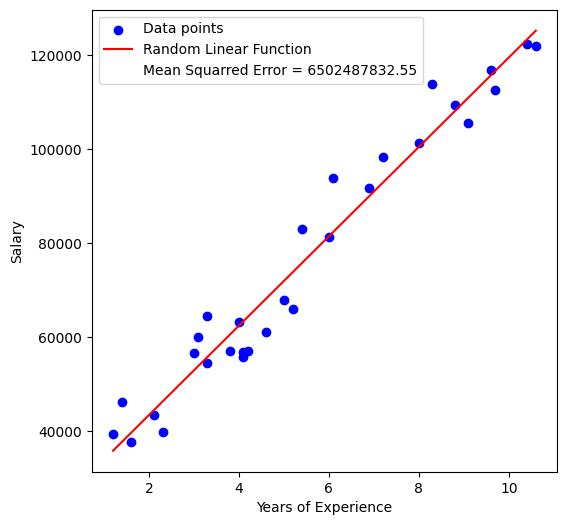

In [65]:
plt.figure(figsize=(6, 6))
plt.scatter(df['YearsExperience'], df['Salary'], color = 'blue', label = 'Data points')
plt.plot(df['YearsExperience'], a * df['YearsExperience'] + b, color = 'red', label = 'Random Linear Function')
plt.plot([], [], ' ', label=f'Mean Squarred Error = {round(6502487832.552401,2)}')
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.legend()
plt.show()

In [ ]:
#As we can see the error is GIGANTIC, let's try to minimalise it

In [ ]:
#We will use partial derivatives in order to see how our error is dependent on our parameters, and then we will want to change our parameters accordingly or more precisly, oppositely to the value we have calculated. For example: a = a - LearningRate * delta E / delta a

In [61]:
def gradientDescent(a: float , b: float , df, learningRate):

    gradient_a = 0
    gradient_b = 0

    x = df['YearsExperience']
    y = df['Salary']

    for i in range(len(df)):

        gradient_a += -2 * (y[i] - (a * x[i] + b)) * x[i]
        gradient_b += -2 * (y[i] - (a * x[i] + b))

    gradient_a /= len(df)
    gradient_b /= len(df)

    a -= learningRate * gradient_a
    b -= learningRate * gradient_b

    return a,b
    

In [58]:
print(f'a: {a}, b: {b}')

a: 0.5714025946899135, b: 0.4288890546751146


In [59]:
#Now we will train our model

In [62]:
for epoch in range(1000):

    a,b = gradientDescent(a,b,df,0.01)

    if epoch % 100 == 0:
        print(f'a: {a}, b: {b}')




    
    

a: 9700.189376046996, b: 1520.4384474193303
a: 11673.609753662076, b: 9697.3468900525
a: 10922.961274516125, b: 14811.902218152594
a: 10425.713191081679, b: 18199.90992771423
a: 10096.323785323415, b: 20444.209872419895
a: 9878.128111493163, b: 21930.88955959731
a: 9733.589910670822, b: 22915.70288523141
a: 9637.844238310649, b: 23568.06754367901
a: 9574.41994131826, b: 24000.20999800396
a: 9532.406121269592, b: 24286.47182781307


In [ ]:
#Visualising

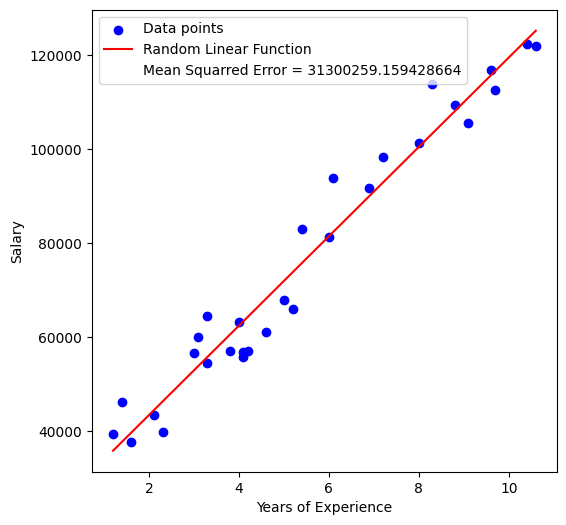

In [66]:
plt.figure(figsize=(6, 6))
plt.scatter(df['YearsExperience'], df['Salary'], color = 'blue', label = 'Data points')
plt.plot(df['YearsExperience'], a * df['YearsExperience'] + b, color = 'red', label = 'Random Linear Function')
plt.plot([], [], ' ', label=f'Mean Squarred Error = {MSE(a,b,df)}')
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.legend()
plt.show()

In [ ]:
#So we have minimised our error

In [67]:
print(f'Error without opt.: 6502487832.552401 and after: {MSE(a,b,df)}')

Error without opt.: 6502487832.552401 and after: 31300259.159428664


In [68]:
print(f'The difference is equal to: {6502487832.552401-MSE(a,b,df)}')

The difference is equal to: 6471187573.392972


In [72]:
print(f'or: {(MSE(a,b,df)-6502487832.552401)/6502487832.552401*100} in percents')

or: -99.51864178810554 in percents
